# MLP多层感知机，和softmax基本没差

## 这里会有两个版本，一个是手写版，另一个是Pytorch简单版本

In [15]:
from tool import *
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms


%matplotlib inline


In [16]:
fashion_mnist_train = torchvision.datasets.FashionMNIST(root="./../data", train=True, download=False, transform=torchvision.transforms.ToTensor())
fashion_mnist_test = torchvision.datasets.FashionMNIST(root="./../data", train=False, download=False, transform=torchvision.transforms.ToTensor())

train_data_load = torch.utils.data.DataLoader(dataset=fashion_mnist_train, batch_size=256, shuffle=True)
test_data_load = torch.utils.data.DataLoader(dataset=fashion_mnist_test, batch_size=256, shuffle=False)

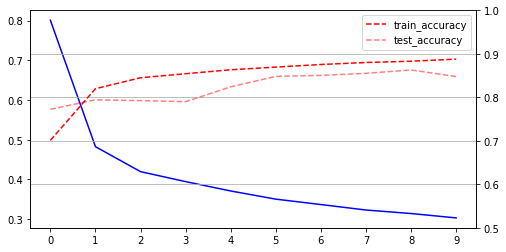

In [18]:
## 定义model

W_1 = torch.normal(mean=0, std=0.01, size=(784, 256), requires_grad=True)
b_1 = torch.normal(mean=0, std=0.01, size=(256,), requires_grad=True)
print(W_1.shape, b_1.shape)

W_2 = torch.normal(mean=0, std=0.01, size=(256, 10), requires_grad=True)
b_2 = torch.normal(mean=0, std=0.01, size=(10,), requires_grad=True)

params = [W_1, b_1, W_2, b_2]

def relu(x):
    return torch.maximum(x, torch.zeros_like(x))

def MLP(X):
    hidden = relu(X.reshape(X.shape[0], -1) @ W_1 + b_1)
    return hidden @ W_2 + b_2

## 定义损失
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params, lr=0.5)



## 开始训练

epoch_num = 10
animation = Animation(epoch_show_num=10, secondary=True)

for epoch in range(epoch_num):
    
    accu = Accumulator(3)

    for batch_X, batch_y in train_data_load:
        batch_y_hat = MLP(batch_X)
        batch_loss = loss(batch_y_hat, batch_y)
        
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            batch_num = len(batch_y)
            batch_accuracy = accuracy(batch_y_hat, batch_y)
            accu.add([batch_num, float(batch_loss) * batch_num, batch_accuracy])
        
        
    rst_1 = [x/accu.data[0] for x in accu.data][1:]
    rst_2 = accuracy_iter(MLP, iter(test_data_load))

    animation.add(
        data_l=[rst_1[0]], data_r=[rst_1[1], rst_2[0]],   
        legends_l=["train_loss"], legends_r=["train_accuracy", "test_accuracy"])

### Torch实现

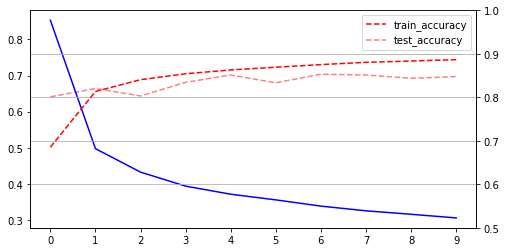

In [17]:
MLP = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
    )
    
## init参数

def init_weights(M):
    if type(M) == torch.nn.Linear:
        torch.nn.init.normal_(M.weight, mean=0, std=0.01)
        torch.nn.init.normal_(M.bias, mean=0, std=0.01)
        
MLP.apply(init_weights)

## loss、optimizer

epoch_num = 10
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(MLP.parameters(), lr=0.5)

animation = Animation(epoch_show_num=10, secondary=True)

for epoch in range(epoch_num):
    
    accu = Accumulator(3)

    for batch_X, batch_y in train_data_load:
        batch_y_hat = MLP(batch_X)
        batch_loss = loss(batch_y_hat, batch_y)
        
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            batch_num = len(batch_y)
            batch_accuracy = accuracy(batch_y_hat, batch_y)
            accu.add([batch_num, float(batch_loss) * batch_num, batch_accuracy])
        
        
    rst_1 = [x/accu.data[0] for x in accu.data][1:]
    rst_2 = accuracy_iter(MLP, iter(test_data_load))

    animation.add(
        data_l=[rst_1[0]], data_r=[rst_1[1], rst_2[0]],   
        legends_l=["train_loss"], legends_r=["train_accuracy", "test_accuracy"])